In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


kcc = pd.read_csv('data_files/kc_cleaned.csv')
kcc.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
0,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
1,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
2,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
3,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
4,5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


In [5]:
kcc.drop(['Unnamed: 0'], axis=1, inplace=True)
kcc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
1,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
4,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


In [6]:
data_corr = kcc[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_basement']]
data_corr.head()

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot,sqft_basement
0,3,2.25,2570,1690,7242,400.0
1,2,1.00,770,2720,10000,0.0
2,4,3.00,1960,1360,5000,910.0
3,3,2.00,1680,1800,8080,0.0
4,4,4.50,5420,4760,101930,1530.0


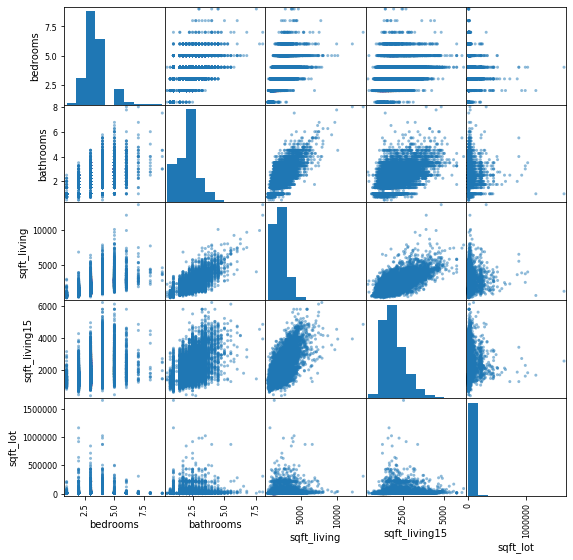

In [7]:
pd.plotting.scatter_matrix(data_corr,figsize  = [9, 9]);
plt.show()

In [8]:
data_corr.corr()

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot
bedrooms,1.000000,0.532302,0.596371,0.408116,0.031070
bathrooms,0.532302,1.000000,0.756275,0.570204,0.085184
sqft_living,0.596371,0.756275,1.000000,0.755813,0.173442
sqft_living15,0.408116,0.570204,0.755813,1.000000,0.146230
sqft_lot,0.031070,0.085184,0.173442,0.146230,1.000000


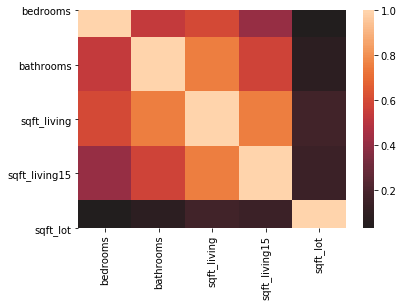

In [9]:
import seaborn as sns
sns.heatmap(data_corr.corr(), center=0);
#Looks like (Bathrooms vs sqft_living) and (sqft_living vs sqft_living15) show a high correlation.

In [10]:
kcc.drop(['bathrooms', 'sqft_living15'], axis=1, inplace=True)
kcc.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,yrs_renovated,sale_month
0,6414100192,12/9/2014,538000.0,3,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,29.0,12
1,5631500400,2/25/2015,180000.0,2,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,0.0,2
2,2487200875,12/9/2014,604000.0,4,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,0.0,12
3,1954400510,2/18/2015,510000.0,3,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,0.0,2
4,7237550310,5/12/2014,1230000.0,4,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,0.0,5


In [11]:
continuous = ['price', 'sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'floors', 'condition', 'waterfront', 'grade', 'zipcode', 'sale_month']

In [12]:
kcc_ohe = pd.get_dummies(kcc[categoricals], columns=['bedrooms', 'floors','condition', 'waterfront', 'grade', 'zipcode', 'sale_month'])
kcc_ohe = kcc_ohe.astype('float')

In [13]:
# # Log transform and normalize
kcc_cont = kcc[continuous]

# # log features
# log_names = [f'{column}_log' for column in kcc_cont.columns]

# kcc_log = np.log(kcc_cont)
# kcc_log.columns = log_names

# # normalize (subract mean and divide by std)
# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# kcc_log_norm = kcc_log.apply(normalize)


In [14]:
preprocessed_log = pd.concat([kcc_cont, kcc_ohe], axis=1)
preprocessed_log.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,538000.0,2570,7242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,180000.0,770,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,604000.0,1960,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,510000.0,1680,8080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1230000.0,5420,101930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
preprocessed_log.columns = [col.replace('.', '_') for col in preprocessed_log.columns]
preprocessed_log.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,538000.0,2570,7242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,180000.0,770,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,604000.0,1960,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,510000.0,1680,8080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1230000.0,5420,101930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = preprocessed_log.drop('price', axis=1)
y = preprocessed_log['price']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Using a test size of 20%

In [19]:
df = pd.concat([y_train, X_train], axis=1)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15372 entries, 6878 to 3468
Columns: 117 entries, sqft_living to sale_month_12
dtypes: float64(115), int64(2)
memory usage: 13.8 MB


In [21]:
outcome = y_train
x_cols = X_train

In [22]:
x_cols.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       ...
       'sale_month_3', 'sale_month_4', 'sale_month_5', 'sale_month_6',
       'sale_month_7', 'sale_month_8', 'sale_month_9', 'sale_month_10',
       'sale_month_11', 'sale_month_12'],
      dtype='object', length=117)

In [23]:
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
6878,182000.0,-1.109590,-0.186422,-0.09792,-0.380813,1.097751,-0.687712,-0.283950,-0.10854,-0.044951,...,-0.308129,-0.341669,-0.354705,-0.333178,-0.339171,-0.316161,3.325019,-0.304062,-0.268536,-0.267141
1289,5350000.0,6.391059,0.208027,-0.09792,-0.380813,-0.910894,-0.687712,3.521521,-0.10854,-0.044951,...,-0.308129,2.926618,-0.354705,-0.333178,-0.339171,-0.316161,-0.300731,-0.304062,-0.268536,-0.267141
12565,420000.0,-0.925856,-0.123466,-0.09792,-0.380813,1.097751,-0.687712,-0.283950,-0.10854,-0.044951,...,-0.308129,-0.341669,-0.354705,-0.333178,-0.339171,-0.316161,3.325019,-0.304062,-0.268536,-0.267141
620,480000.0,0.100890,-0.109951,-0.09792,-0.380813,-0.910894,1.454003,-0.283950,-0.10854,-0.044951,...,-0.308129,-0.341669,-0.354705,-0.333178,-0.339171,-0.316161,-0.300731,-0.304062,3.723659,-0.267141
1503,326000.0,-0.329263,-0.323311,-0.09792,-0.380813,1.097751,-0.687712,-0.283950,-0.10854,-0.044951,...,-0.308129,-0.341669,-0.354705,-0.333178,-0.339171,3.162741,-0.300731,-0.304062,-0.268536,-0.267141


In [24]:
predictors = '+'.join(x_cols.columns)
predictors

'sqft_living+sqft_lot+bedrooms_1+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bedrooms_7+bedrooms_8+bedrooms_9+floors_1_0+floors_1_5+floors_2_0+floors_2_5+floors_3_0+floors_3_5+condition_1+condition_2+condition_3+condition_4+condition_5+waterfront_0_0+waterfront_1_0+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+zipcode_98001+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+z

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


outcome = 'price'
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     668.8
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:49:27   Log-Likelihood:            -2.0544e+05
No. Observations:               15372   AIC:                         4.111e+05
Df Residuals:                   15261   BIC:                         4.120e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.432e+05   1247.999    435.228      0.000    5.41e+05    5.46e+05
sqft_living     1.602e+05   2498.367     64.103      0.000    1.55e+05    1.65e+05
sqft_lot        8280.3670   1383.204      5.986      0.000    5569.121     1.1e+04
bedrooms_1       419.8167   1302.378      0.322      0.747   -2132.999    2972.633
bedrooms_2      4401.6720   1254.251      3.509      0.000    1943.190    6860.154
bedrooms_3      5362.5113    858.201      6.249      0.000    3680.335    7044.687
bedrooms_4     -4882.4256    961.599     -5.077      0.000   -6767.274   -2997.577
bedrooms_5     -3767.5818   1238.494     -3.042      0.002   -6195.178   -1339.985
bedrooms_6     -4700.3988   1263.535     -3.720      0.000   -7177.077   -2223.720
bedrooms_7     -6874.1447   1262.805     -5.444      0.000   -9349.394   -4398.896
bedrooms_8     -1201.7085   1267.543     -0.948      0.343   -3686.244    1282.827
bedrooms_9     -3404.9701   1263.069     -2.696      0.007   -5880.736    -929.204
floors_1_0      2659.3022    899.446      2.957      0.003     896.281    4422.324
floors_1_5      2191.4020   1163.064      1.884      0.060     -88.343    4471.147
floors_2_0     -2081.1704    967.488     -2.151      0.031   -3977.563    -184.778
floors_2_5      4693.1242   1260.825      3.722      0.000    2221.757    7164.491
floors_3_0     -8028.0564   1299.066     -6.180      0.000   -1.06e+04   -5481.731
floors_3_5        52.8578   1262.658      0.042      0.967   -2422.103    2527.818
condition_1    -3939.2125   1263.496     -3.118      0.002   -6415.816   -1462.609
condition_2    -3078.3458   1245.170     -2.472      0.013   -5519.027    -637.664
condition_3    -9568.5017    760.030    -12.590      0.000   -1.11e+04   -8078.752
condition_4     3379.5411    826.406      4.089      0.000    1759.687    4999.396
condition_5     1.302e+04   1108.741     11.740      0.000    1.08e+04    1.52e+04
waterfront_0_0 -3.804e+04    646.866    -58.801      0.000   -3.93e+04   -3.68e+04
waterfront_1_0  3.804e+04    646.866     58.801      0.000    3.68e+04    3.93e+04
grade_3          744.3774   1258.136      0.592      0.554   -1721.719    3210.474
grade_4          756.2307   1273.733      0.594      0.553   -1740.437    3252.899
grade_5        -5453.2502   1322.767     -4.123      0.000   -8046.032   -2860.469
grade_6        -1.811e+04   1392.549    -13.004      0.000   -2.08e+04   -1.54e+04
grade_7        -3.205e+04   1087.419    -29.476      0.000   -3.42e+04   -2.99e+04
grade_8        -1.436e+04    946.930    -15.167      0.000   -1.62e+04   -1.25e+04
grade_9         1.915e+04   1260.458     15.196      0.000    1.67e+04    2.16e+04
grade_10        4.267e+04   1421.484     30.015      0.000    3.99e+04    4.55e+04
grade_11        5.297e+04   1439.665     36.792      0.000    5.01e+04    5.58e+04
grade_12    

In [ ]:
import scipy.stats as stats
import statsmodels.stats.api as sms


# results = []
# for idx, column in enumerate(df.columns):
#     print (f"KCC - Regression Analysis and Diagnostics for SalePrice~{column}")
#     print ("-------------------------------------------------------------------------------------")

#     f = f'price~{column}'
#     model = smf.ols(formula=f, data=df).fit()
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#     fig.tight_layout()
#     plt.show()
    
#     results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
#     input("Press Enter to continue...")

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

In [ ]:
plt.scatter(model.predict(x_cols), model.resid)
plt.plot(model.predict(x_cols), [0 for i in range(len(df))])